In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\int _{x_i -h} ^{x_i +h} f(x)dx = \frac{f_{i-1} +4f_i +f_{i+1}}{3}h
$$
Para el primer segmento no apareado la integral es:
$$
\int _{x_0} ^{x_0 +h} f(x)dx = \frac{23f_{0} +26f_1 -4f_{2} + 6f_3 -3f_4}{48}h
$$

In [103]:
def integrar(f,x):
    int_f , m , h = 0 , len(f)%2 , x[1]-x[0]
    N = int(len(f)/2)
    if m == 0:
        N += -1
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5]) /16.0
    for i in range(N):
        indice = 2*i +1
        int_f += f[indice-1] + 4*f[indice] + f[indice+1]
    return int_f*h/3.0

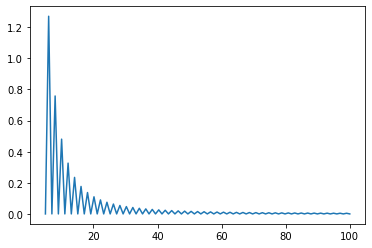

In [112]:
elementos = 100
integrales = np.zeros(elementos-5)
for num in range(5,elementos):
    x = np.linspace(0,2*np.pi,num)
    y = np.sin(x)
    integrales[num-5] = integrar(y,x)
plt.plot(np.linspace(5,elementos,elementos-5),integrales)

## Obtengamos la primitiva de una función iterando un pequeño intervalo del algoritmo
$$
\int _{x_0} ^{x_0 +h} f(x)dx = \frac{23f_{0} +26f_1 -4f_{2} + 6f_3 -3f_4}{48}h
$$

In [114]:
def primitiva(f,x,F0):
    F , h = np.zeros_like(f) , x[1]-x[0]
    F[0] = F0
    for i in range(len(f)-5):
        F[i+1] = F[i] + (23*f[i] + 26*f[i+1] - 4*f[i+2] + 6*f[i+3] - 3*f[i+4])*h/48
    return F

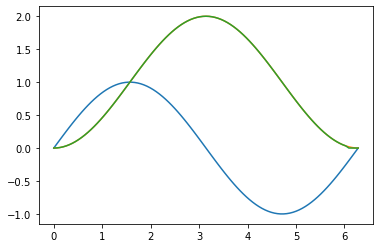

In [122]:
x = np.linspace(0,2*np.pi,num)
y = np.sin(x)
YY = -np.cos(x)+1
YY_num = primitiva(y,x,0)
plt.plot(x,y)
plt.plot(x,YY)
plt.plot(x,YY_num)
plt.show()